Normal Test on uminusr


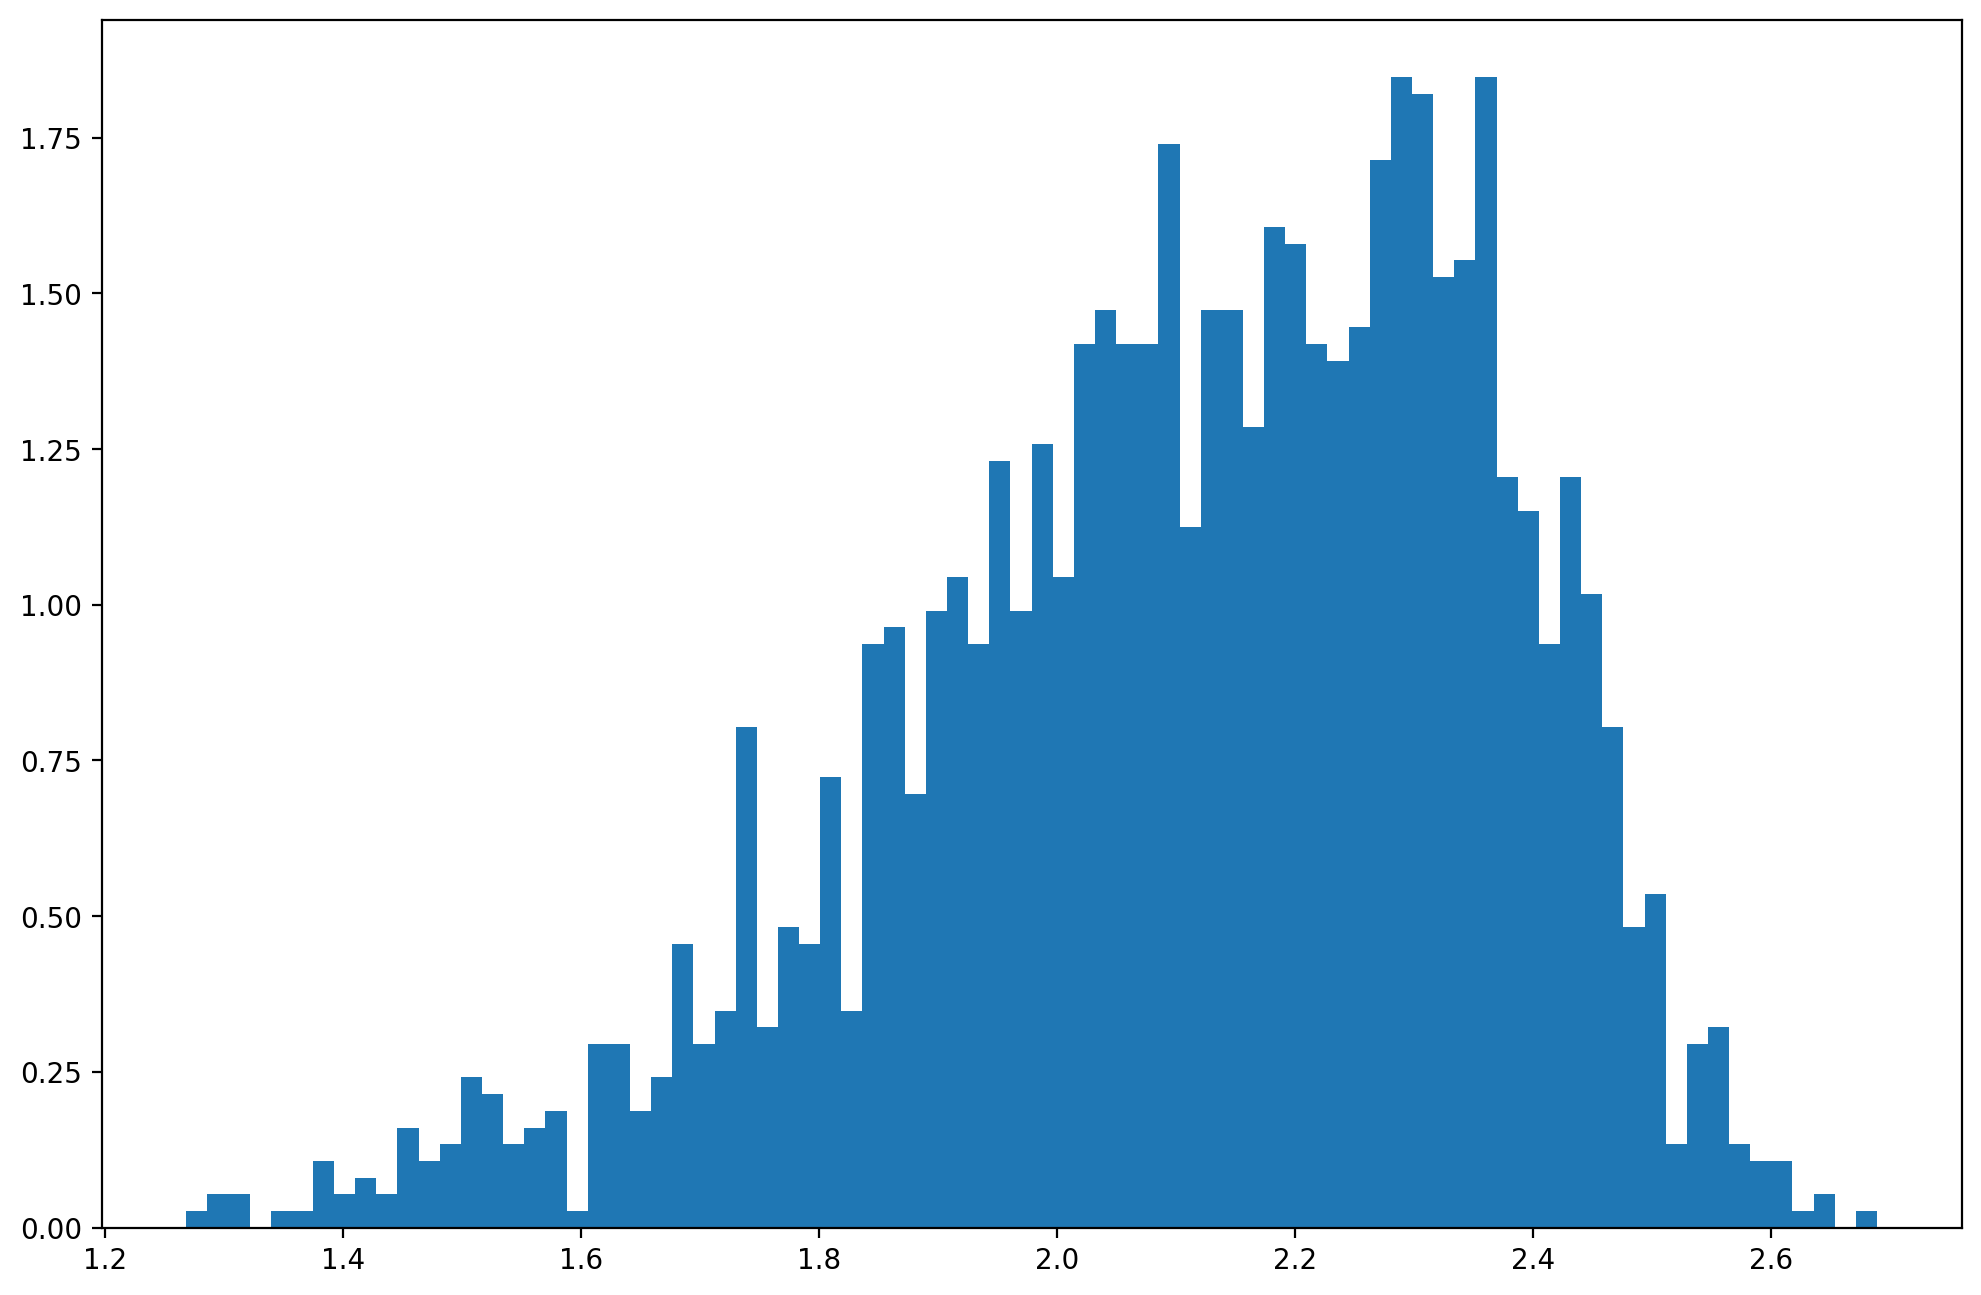

kstest uminusr norm : 0.9178573922906192, 0.0
kstest uminusr norm greater : 0.0036772137154570395, 0.9424064637270572
kstest uminusr norm less : 0.9178573922906192, 0.0
Shapiro uminusr 0.9743831753730774,5.917105196975841e-19
Anderson uminusr 13.062416847272289,[0.575 0.655 0.786 0.916 1.09 ], [15.  10.   5.   2.5  1. ]

Normal Test on CountInCyl


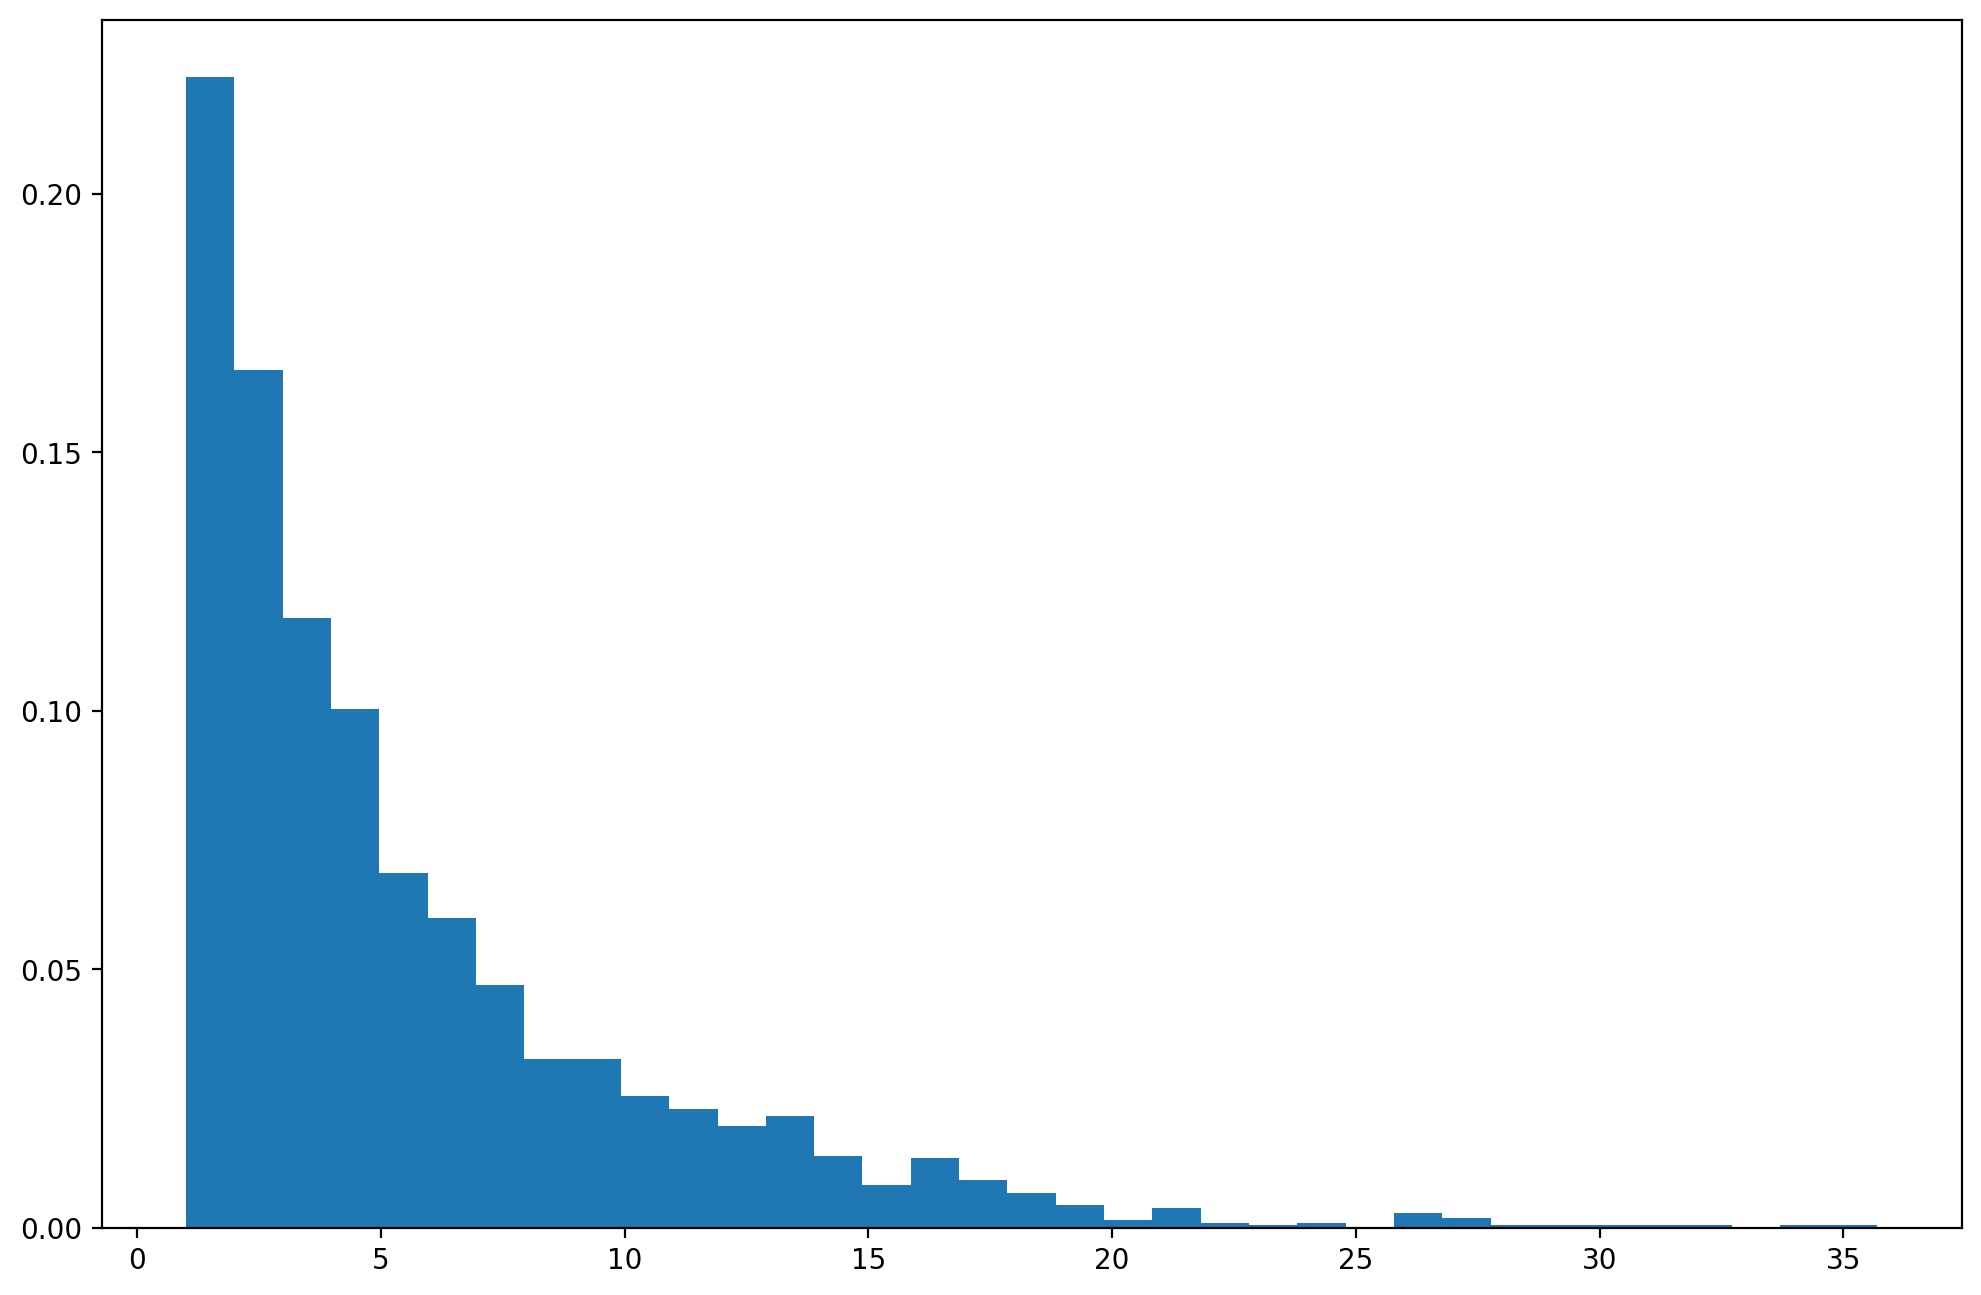

kstest CountInCyl norm : 0.8413447460685429, 0.0
kstest CountInCyl norm greater : 0.0, 1.0
kstest CountInCyl norm less : 0.8413447460685429, 0.0
Shapiro CountInCyl 0.7989774942398071,2.802596928649634e-45
Anderson CountInCyl 121.43362001349396,[0.575 0.655 0.786 0.916 1.09 ], [15.  10.   5.   2.5  1. ]

Normal Test on DistanceTo5nn


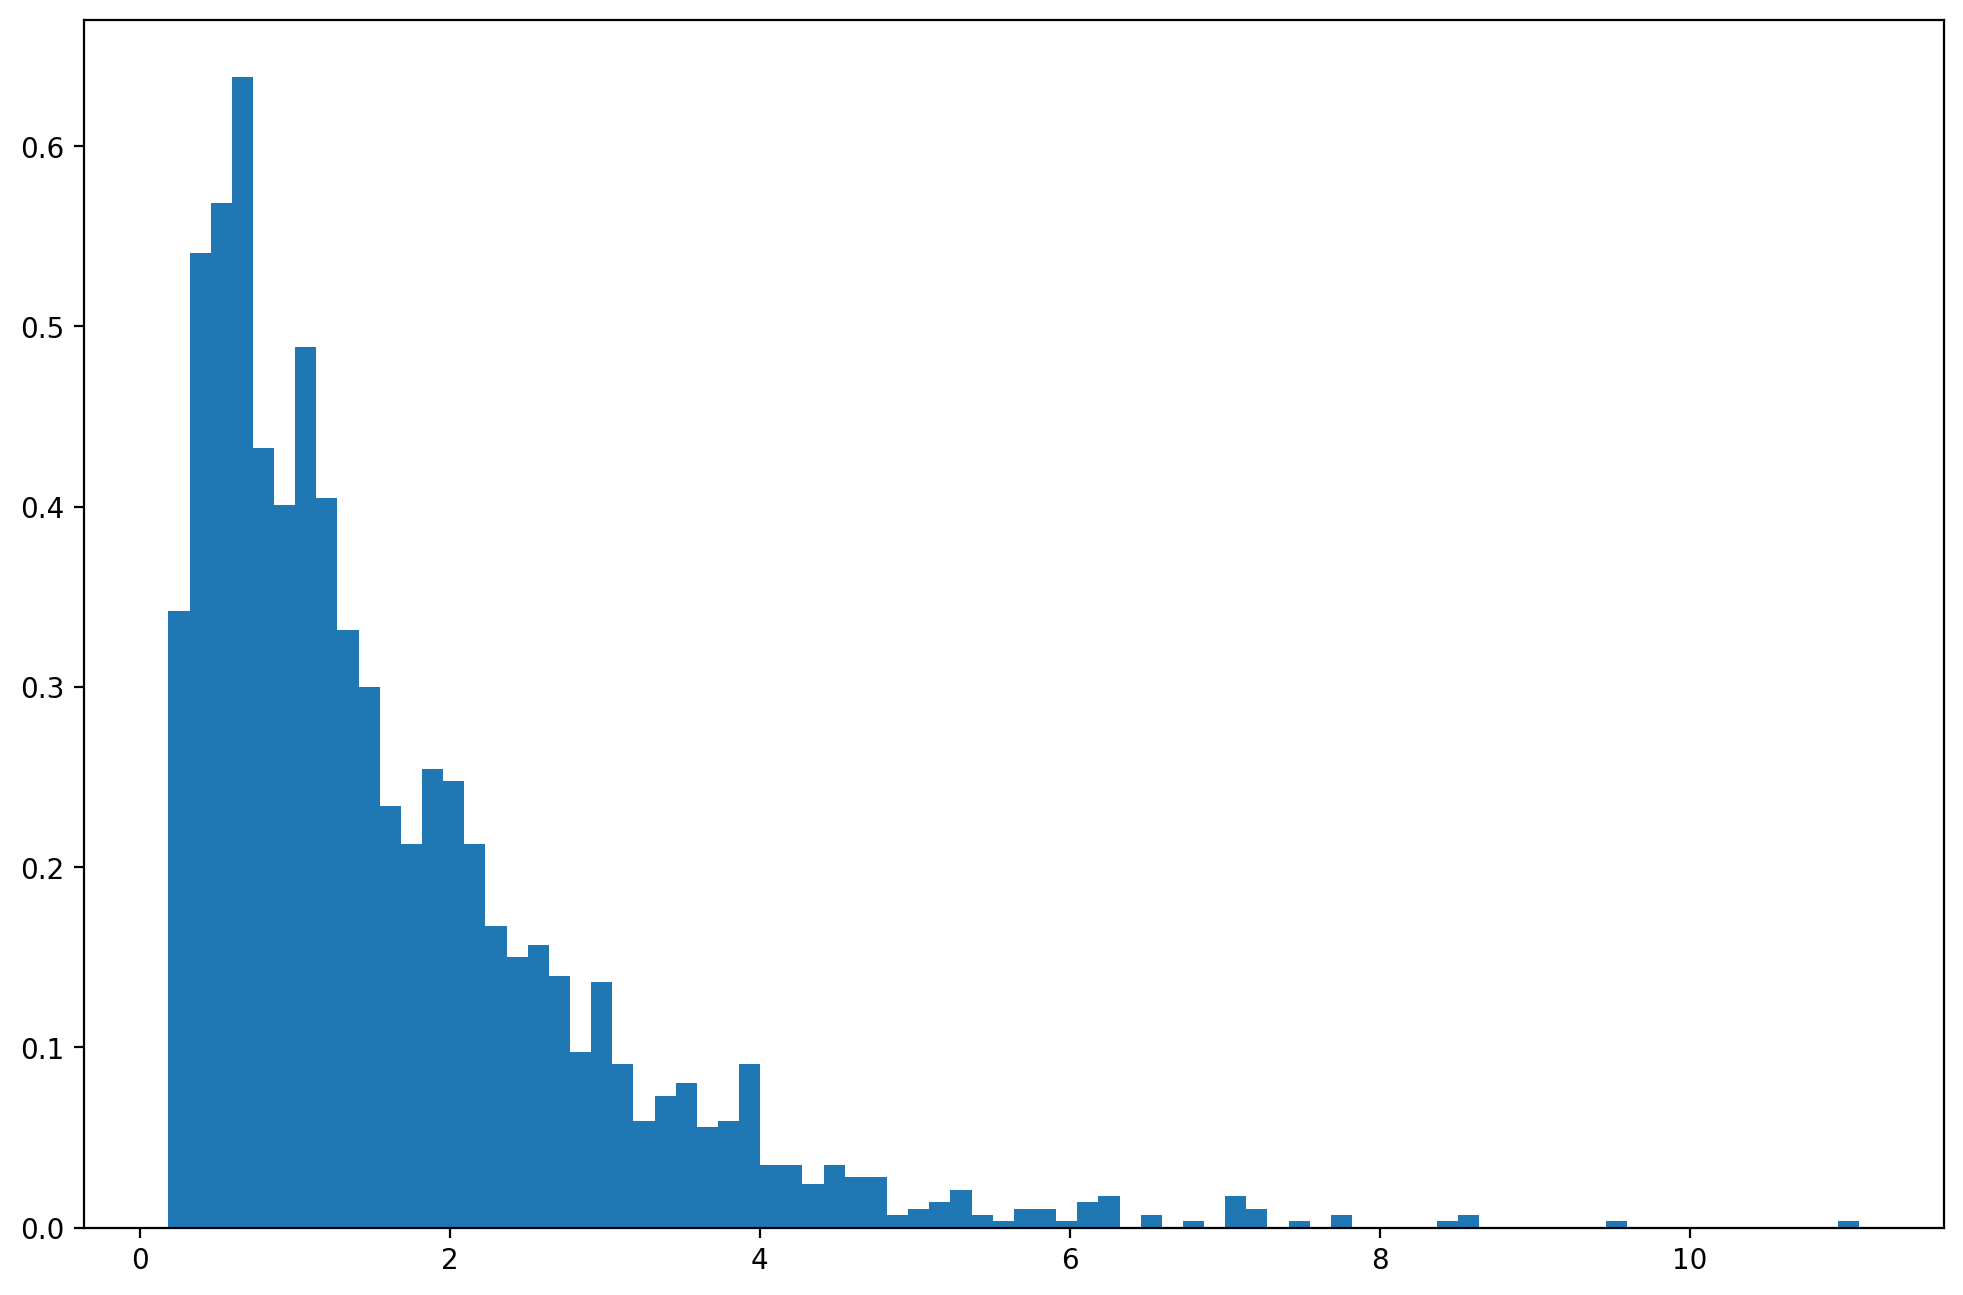

kstest DistanceTo5nn norm : 0.5851797790468813, 0.0
kstest DistanceTo5nn norm greater : 0.0, 1.0
kstest DistanceTo5nn norm less : 0.5851797790468813, 0.0
Shapiro DistanceTo5nn 0.8356611132621765,3.8031240321775535e-42
Anderson DistanceTo5nn 82.90809274425374,[0.575 0.655 0.786 0.916 1.09 ], [15.  10.   5.   2.5  1. ]

 Determined Lamda value : CountInCyl : 0.7
Pearson test uminusr versus CountInCyl 0.07425455849807201, 0.0006546925409130455
Pearson test uminusr versus CountInCyl 0.07425455849807201, 0.0006546925409130455
 Determined Lamda value : DistanceTo5nn : 0.025285971102863927
Pearson test uminusr versus DistanceTo5nn -0.11080926111093004, 3.501847585208165e-07
 Determined Lamda value : uminusr : 2.8449290983629547
Pearson test uminusr versus uminusr 1.0, 0.0
Pearson test Transformed uminusr versus Transformed DistanceTo5nn -0.11525412562998653, 1.1586227111239849e-07


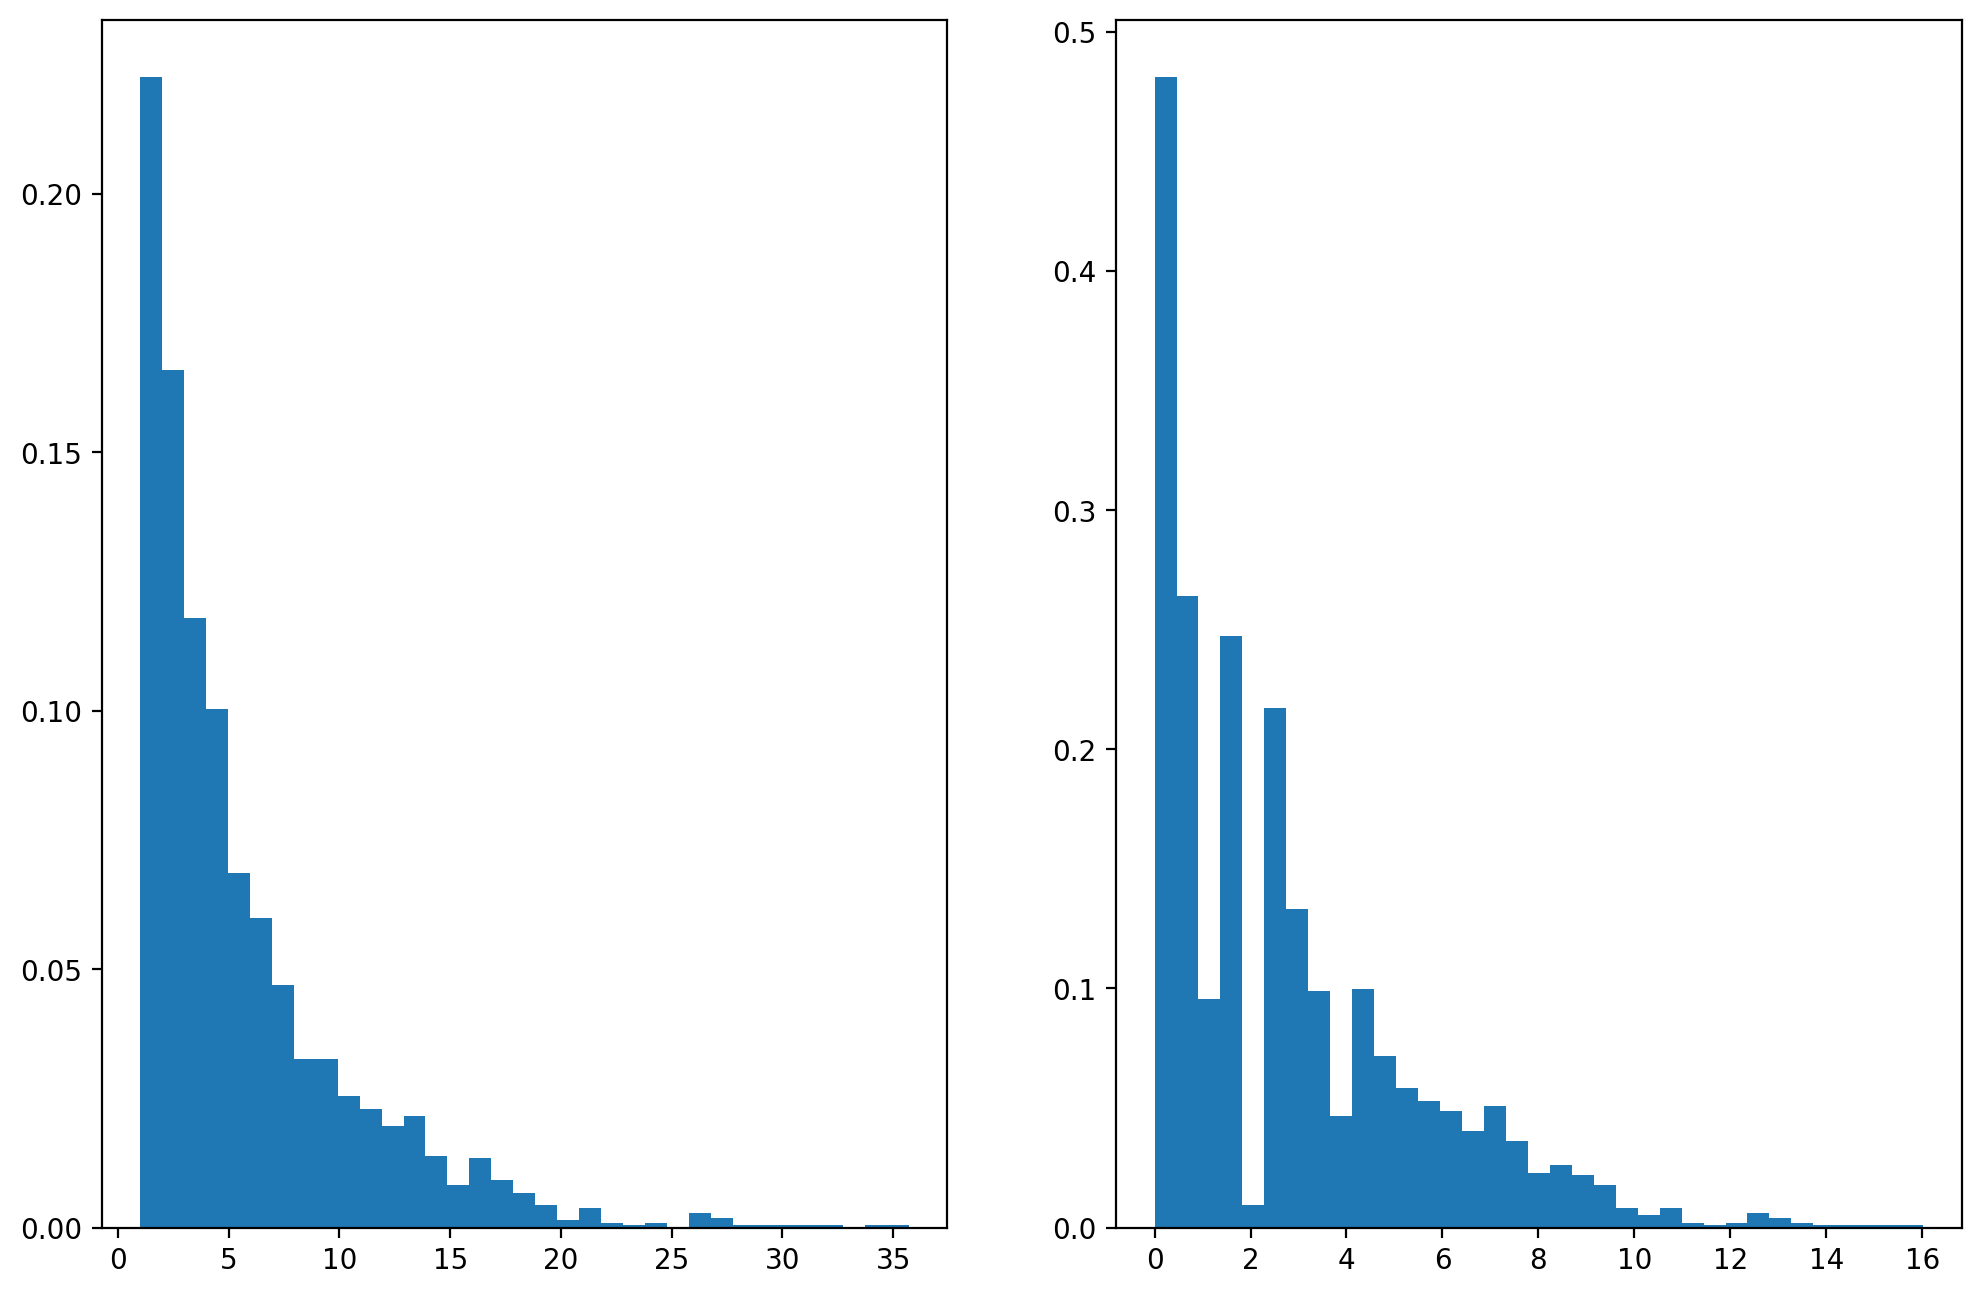

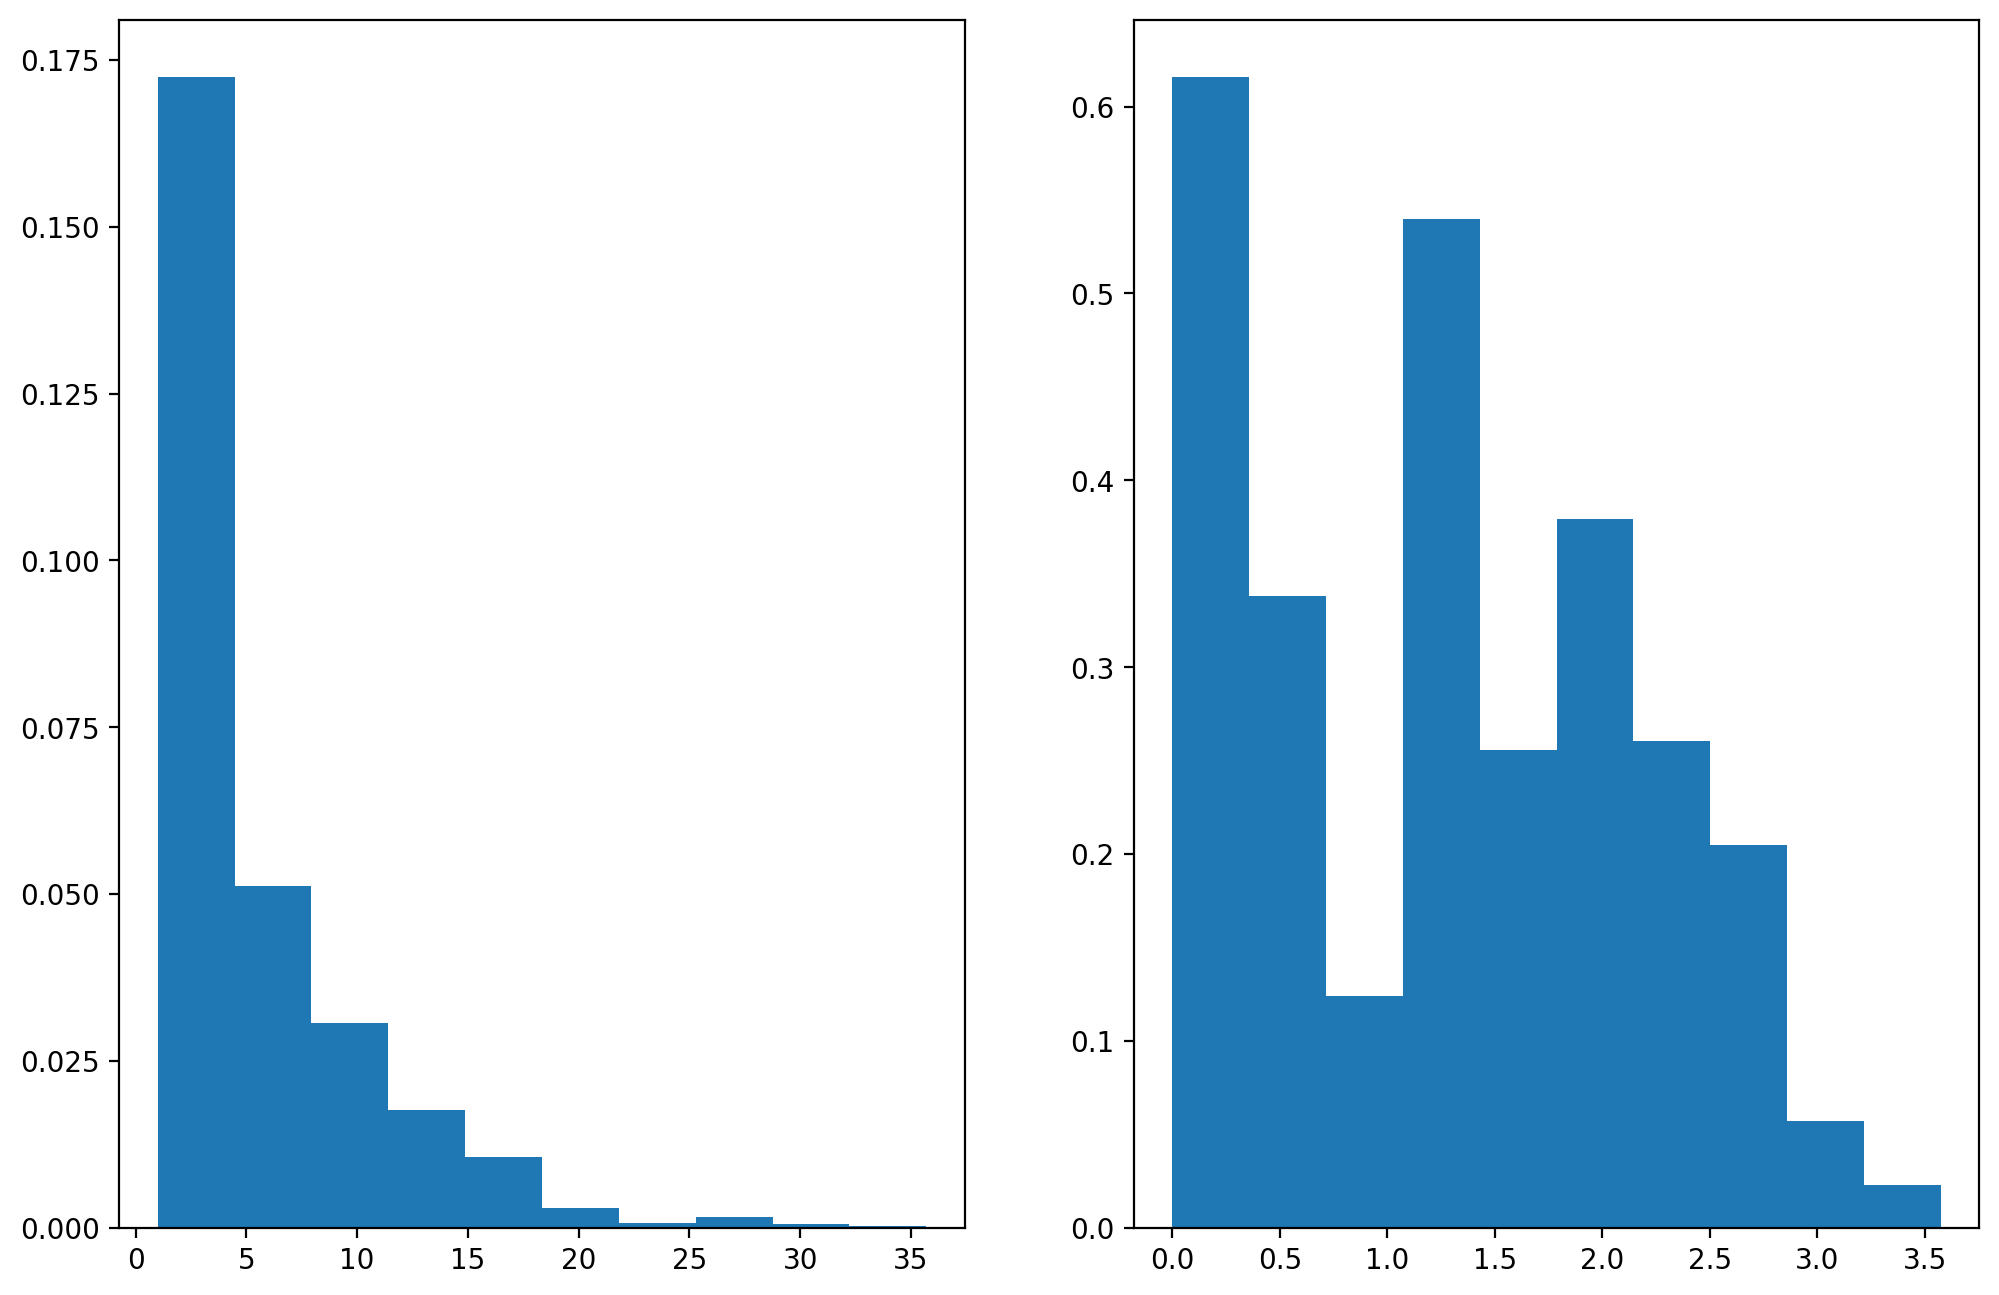

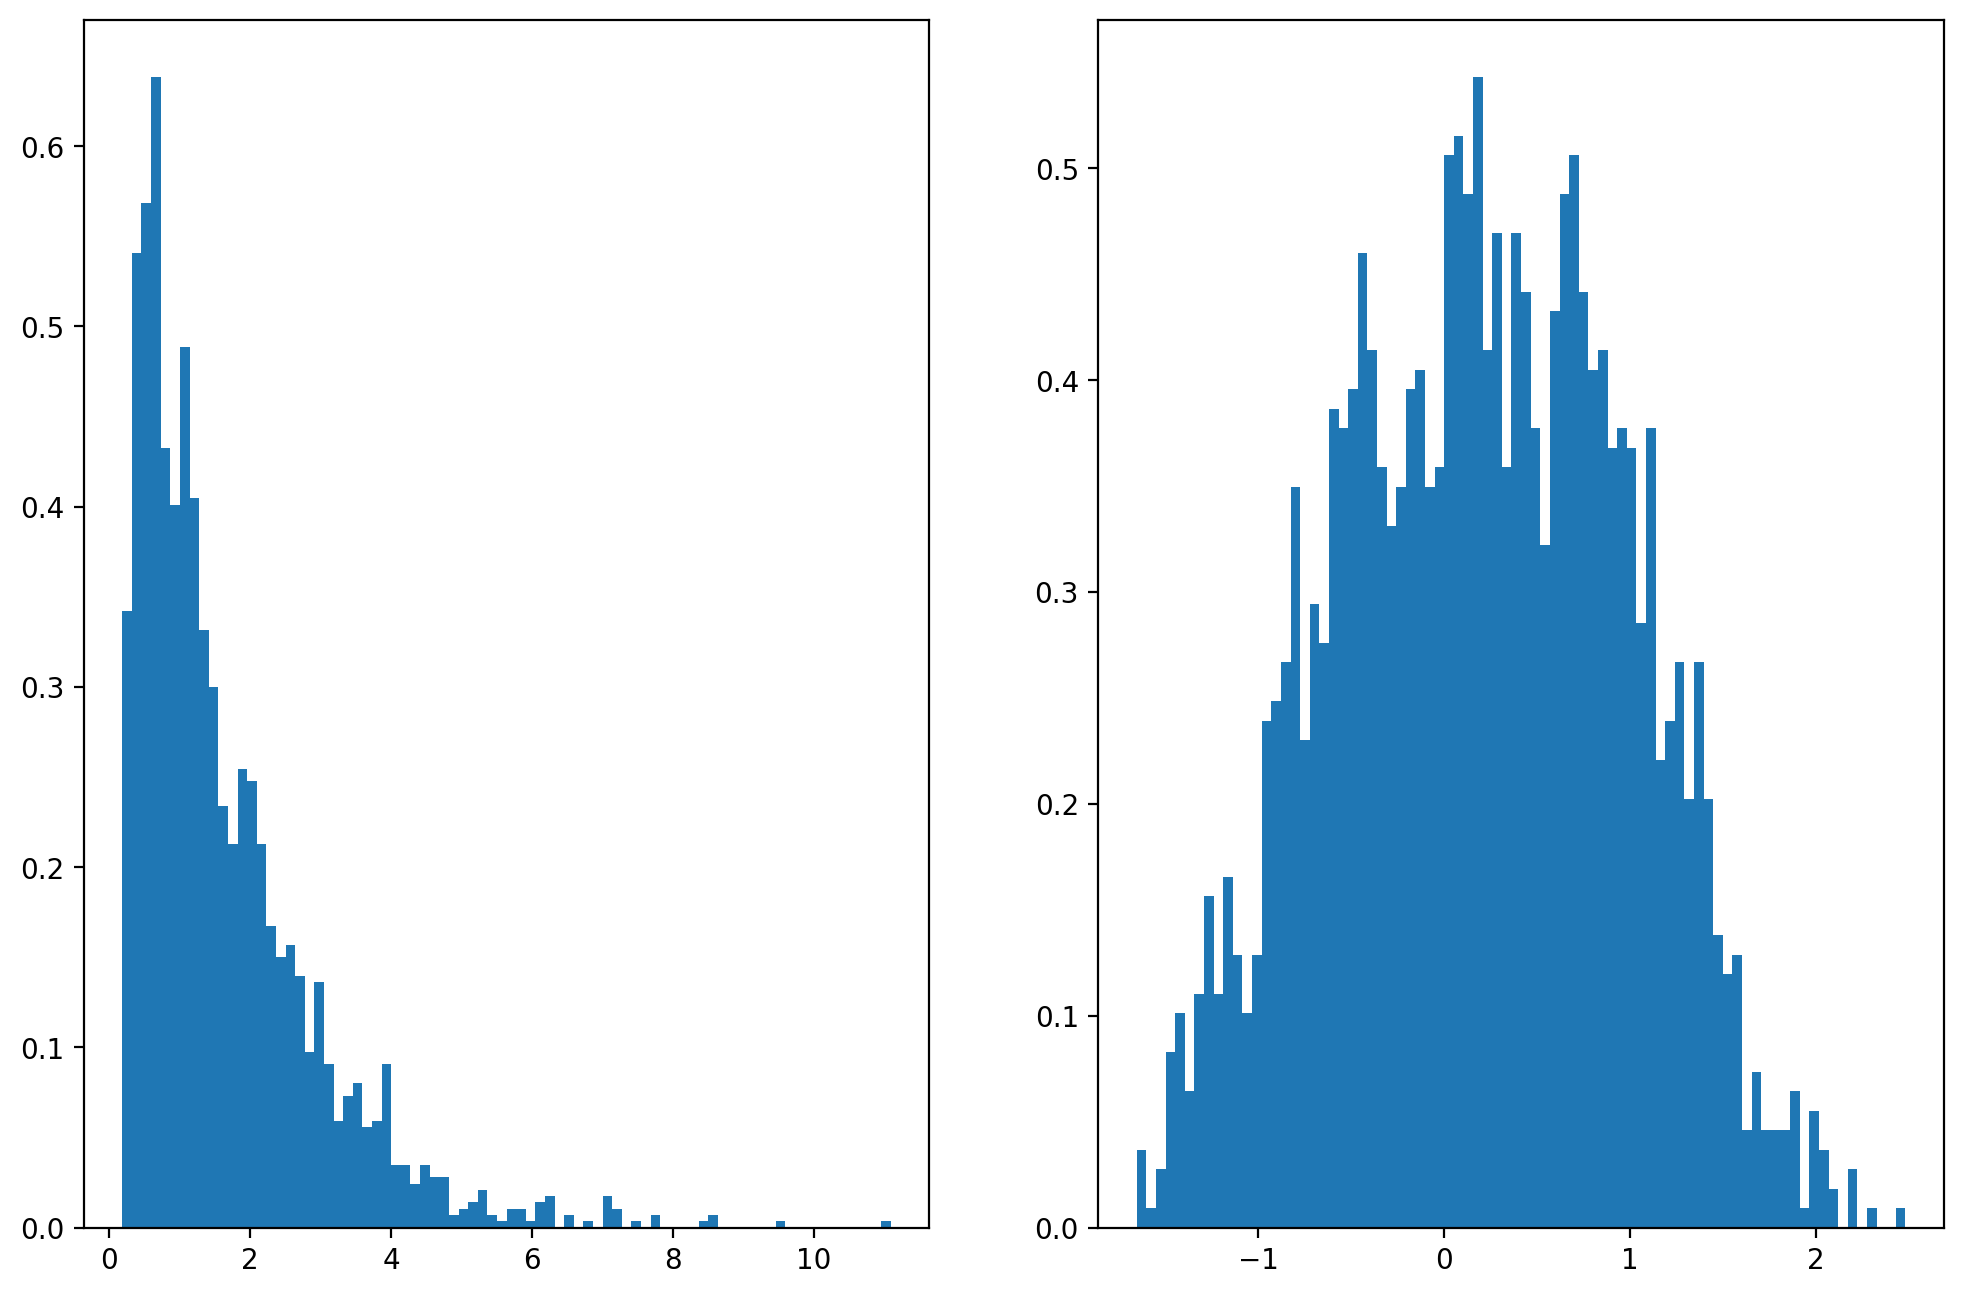

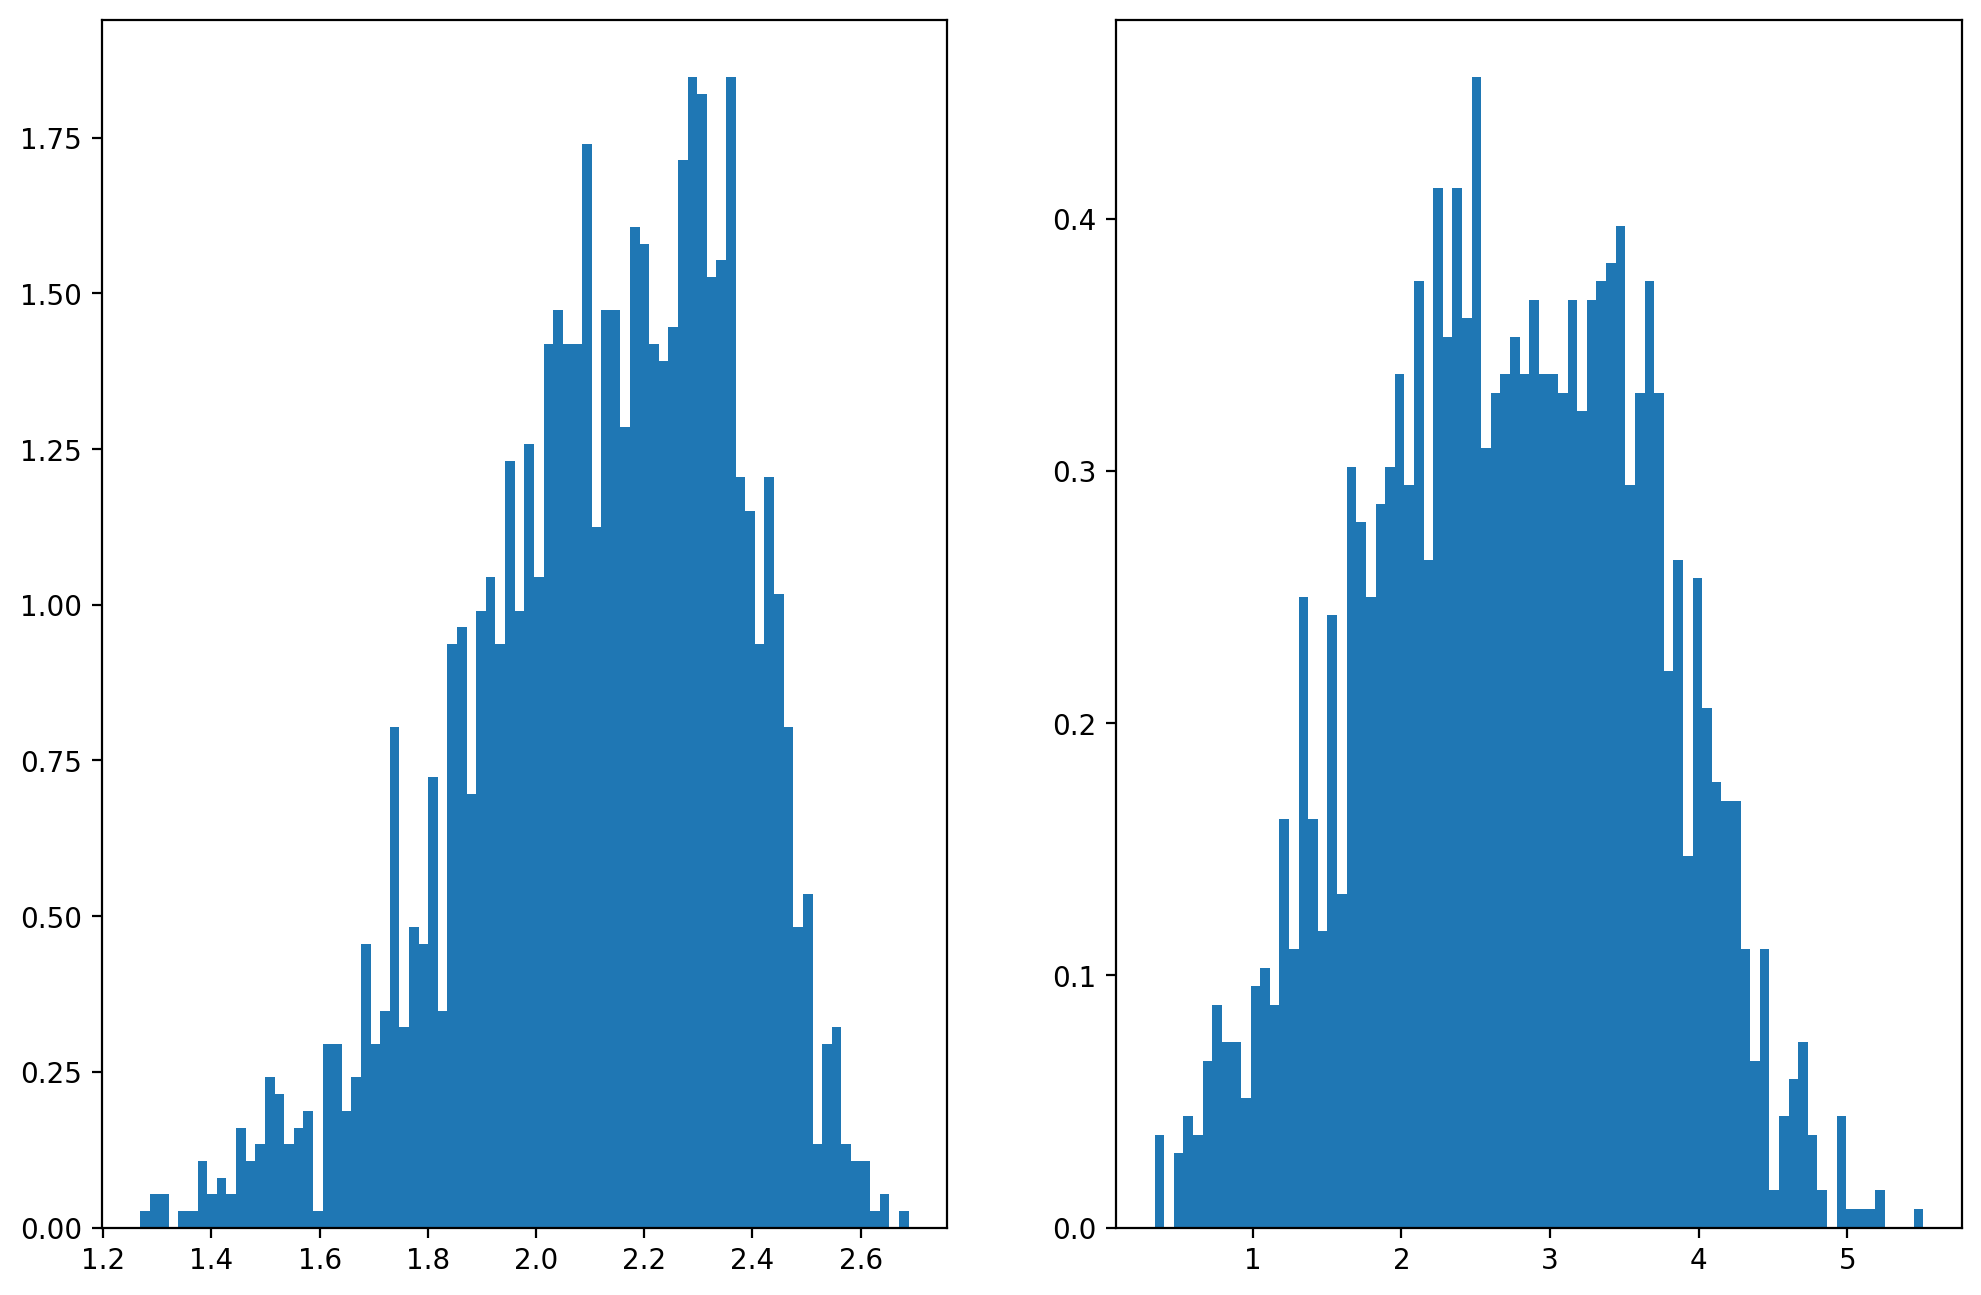

In [38]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from scipy import stats

RawMassEClassEmeasure = Table.read('../../GAMA_Data/EMassEClassEmeasure.fits')
#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
#REMassEClassEmeasure = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange = RawMassEClassEmeasure[RawMassEClassEmeasure['CountInCyl']> -500]
RErange = RErange[RErange['SurfaceDensity']< 50]
RErange = RErange[RErange['uminusr']> 1.2]
RErange = RErange[RErange['uminusr']< 2.7]
RErange = RErange[RErange['CountInCyl'] > 0]

def testNorm(xfield, binCount) :
    
   print('Normal Test on '+xfield)
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 1, 1)
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   plt.show() 
   r, p = stats.kstest(RErange[xfield], 'norm')
   print('kstest '+xfield+' norm : ' +str(r)+', '+str(p))
                                  
   r, p = stats.kstest(RErange[xfield], 'norm',alternative='greater')
   print('kstest '+xfield+' norm greater : ' +str(r)+', '+str(p))
                                  
   r, p = stats.stats.kstest(RErange[xfield], 'norm',alternative='less')
   print('kstest '+xfield+' norm less : ' +str(r)+', '+str(p))
    
   r, p = stats.shapiro(RErange[xfield])
   print('Shapiro '+xfield+' '+str(r)+','+str(p))

   s, cl, sl  = stats.anderson(RErange[xfield],'norm')
   print('Anderson '+xfield+' '+str(s)+','+str(cl)+', '+str(sl))
    
   print() 


def transformNone(xfield, binCount) :
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 2, 1)
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   #ret = stats.boxcox(RErange[xfield],lamda,alpha)
   transdata, lamda = stats.boxcox(RErange[xfield])
   ax2 = fig.add_subplot(1, 2, 2)
   ax2.hist(transdata, bins=binCount, density=True)
   print(' Determined Lamda value : '+xfield+' : '+str(lamda))
   r, p = stats.pearsonr(RErange['uminusr'], RErange[xfield])
   print('Pearson test uminusr versus '+xfield+' '+str(r)+', '+str(p))
   return transdata

def transformLamda(xfield, binCount, lamda) :
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 2, 1)
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   #ret = stats.boxcox(RErange[xfield],lamda,alpha)
   transdata = stats.boxcox(RErange[xfield],lamda)
   ax2 = fig.add_subplot(1, 2, 2)
   ax2.hist(transdata, bins=binCount, density=True)
   print(' Determined Lamda value : '+xfield+' : '+str(lamda))
   r, p = stats.pearsonr(RErange['uminusr'], RErange[xfield])
   print('Pearson test uminusr versus '+xfield+' '+str(r)+', '+str(p))    

def transformLog(xfield, binCount) :
   fig = plt.figure(figsize=(12, 8), dpi=200)
   ax1 = fig.add_subplot(1, 2, 1)
   ax1.hist(RErange[xfield].data, bins=binCount, density=True)
   #ret = stats.boxcox(RErange[xfield],lamda,alpha)
   transdata = np.log(RErange[xfield])
   ax2 = fig.add_subplot(1, 2, 2)
   ax2.hist(transdata, bins=binCount, density=True)
   r, p = stats.pearsonr(RErange['uminusr'], RErange[xfield])
   print('Pearson test uminusr versus '+xfield+' '+str(r)+', '+str(p))   
    
testNorm('uminusr',80)
testNorm('CountInCyl',35)
testNorm('DistanceTo5nn',80)

transformLamda('CountInCyl', 35, 0.7)
transformLog('CountInCyl',10)
T_DistanceTo5nn = transformNone('DistanceTo5nn',80)
T_uminusr = transformNone('uminusr',80)

r, p = stats.pearsonr(T_uminusr,T_DistanceTo5nn)
print('Pearson test Transformed uminusr versus Transformed DistanceTo5nn '+str(r)+', '+str(p))   

plt.show()


